# 树状数组
## 一、作用
用于快速读取列表中**某个区间内所有元素的和**
## 时间复杂度
### 传统方式
1. 访问某个元素：O(1)
2. 获得某区间元素和：O(n)
### 树状数组
1. 访问某个元素：O(logn)
2. 获得某区间元素和：O(logn)
## 二、规则
通过创建一个列表t，记录以二进制划分的区间内元素的和，其中lowbit(x)的位数决定本节点所处的层数，t[x]保存了以x为根的子树中叶节点的值（即区间的元素和）
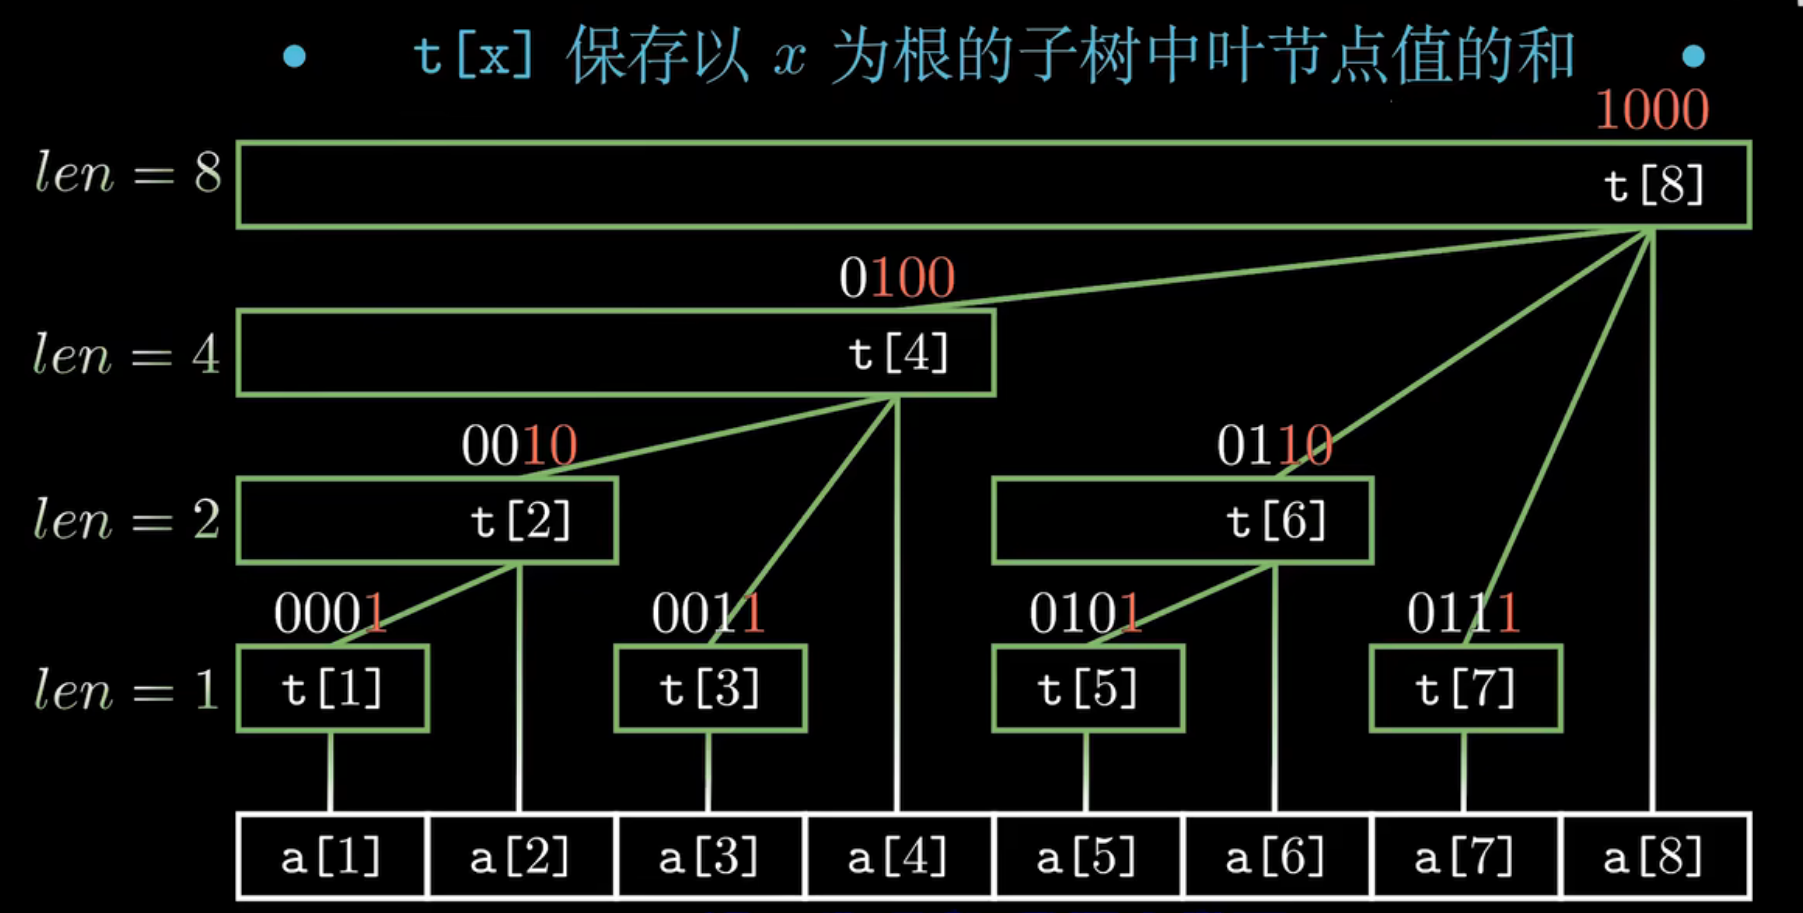
通过观察，
a数组具有以下性质：
- 下标索引从1开始
- 长度为n
t数组具有以下性质：
- t[x]节点覆盖的长度是lowbit(x)
- t[x]的父节点是t[x + lowbit(x)]
- 树的深度为 logn + 1
- t[x]节点覆盖的区间为 [x-lowbit(x)+1, x]，t[x]也即等于t[x]的子节点区间以后到a[x]的所有元素之和!\
$t[x] \equiv \sum_{i = x-lowbit(x)+1}^x a[i]$

In [ ]:
# 树状数组需要自行定义，主体包含lowbit()、add()和query()三个函数
a = [1,2,3,4,5]
n = len(a)
# 创建与树状数组相对应的原数组
a1 = [0] + a
# 创建树状数组
t = [0]*(n+1)

# 用于获取整数x二进制的最小有效位
# example: x = 12 = 1100 则 lowbit(x) = 4 = 100
def lowbit(x):
    return x & (-x)
# 用于在修改原数组时维护树状数组
# 参数startIndex:原数组中将要添加到树状列表管辖的元素的索引
# 参数value:当前操作的元素的值
def add(startIndex, value):
    i = startIndex
    while i <= n:
        t[i] += value
        i += lowbit(i)
# 获取a[1:x+1]区间内的所有元素之和
def ask(x):
    ans = 0
    while x > 0:
        ans += t[x]
        x -= lowbit(x)
    return ans

以下是对整个树状数组各个函数功能的具体分析：

In [ ]:
# 获取正整数x在二进制表示下的最小权重的1以及其右侧的0所组成的数的大小
# example:x = 0b1100100,  lowbit(x) = 0b100 = 4
def lowbit(x):
    return x & (-x)

In [ ]:
# 单点修改
# 根据原数组a[i]的值更新树状数组上与之相关的各个节点以及这些节点的后继节点的值
# 观察可知，树状数组上的节点t[i]的父节点是t[i+lowbit(i)]
# 由前缀和数组的特性可知，需要为t[i]节点以及其所有祖先节点加上a[i]的值
def add(startIndex, v):
    for i in range(startIndex, n, lowbit(i)):
        # 为所有后继的父节点加上a[i]的值
        t[i] += v 

In [ ]:
# 区间查询
# 观察可知，sum[7] = t[7] + t[6] + t[4]
# sum[7] = t[7] + t[7-lowbit(7)] + t[6 - lowbit(6)]
def ask(x):
    ans = 0
    while x > 0:
        ans += t[x]
        x -= lowbit(x)
    return ans

例题：压制二元组的总价值
> 题目链接：[压制二元组的总价值](https://www.lanqiao.cn/problems/12467/learning/?contest_id=166)

In [ ]:
def lowbit(x):
    return x & (-x)
def add(x,y,tree):
    while x <= n:
        tree[x] += y
        x += lowbit[x]
    return tree
def ask(x, tree):
    res = 0
    while x > 0:
        res += tree[x]
        x -= lowbit(x)
    return res
n = int(input())
a = [0]+[int(i) for i in input().split()]
# 记录a数组中各元素的下标
a1 = [0]*(n+1)
for i in range(1,n+1):
    a1[a[i]] = i
b = [0]+[int(i) for i in input().split()]
# 记录b数组中元素在a数组中的下标（将b视作a的重排）
b1 = [0]*(n+1)
for i in range(1, n+1):
    b1[i] = a1[b[i]]
tree1 = [0]*(n+1)
tree2 = [0]*(n+1)
ans = 0
for i in range(1,n+1):
    tree1 = add(b1[i],b1[i],tree1)
    tree2 = add(b1[i],1,tree2)
    ans += b1[i]*ask(b1[i]-1, tree2) - ask(b1[i]-1, tree1)
print(ans)